# Simple Gaussian Process Example/Tutorial

## import libs

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

## generate Dataset

In [12]:
x = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(x * np.sin(x))

## plot Dataset

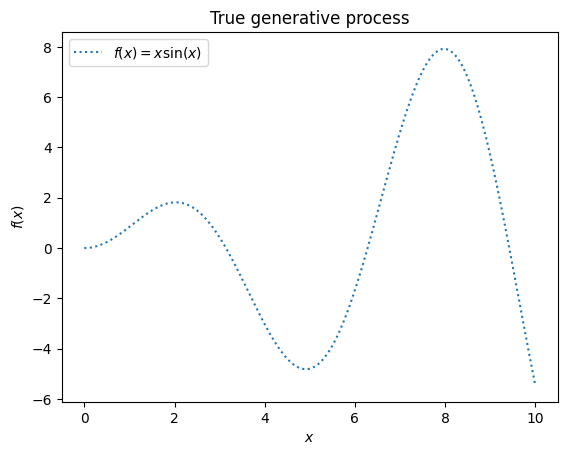

In [13]:
plt.plot(x, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

## Example with noise-free target

In [16]:
rng = np.random.RandomState(1)
#print(f'{rng}')
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
#print(f'{training_indices}')
x_train, y_train = x[training_indices], y[training_indices]
#print(f'x_train = {x_train}')
#print(f'y_train = {y_train}')

## train Model

In [18]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(x_train, y_train)
gaussian_process.kernel_

5.02**2 * RBF(length_scale=1.43)

## Calculate mean prediction and 95% confidence interval for full dataset

In [20]:
mean_prediction, std_prediction = gaussian_process.predict(x, return_std=True)
print(f'mean_prediction = {mean_prediction}')
print(f'std_prediction = {std_prediction}')

mean_prediction = [ 6.72399865e-01  6.80020274e-01  6.87690947e-01  6.95411614e-01
  7.03181996e-01  7.11001797e-01  7.18870712e-01  7.26788422e-01
  7.34754595e-01  7.42768889e-01  7.50830946e-01  7.58940396e-01
  7.67096857e-01  7.75299932e-01  7.83549213e-01  7.91844276e-01
  8.00184687e-01  8.08569996e-01  8.16999739e-01  8.25473439e-01
  8.33990608e-01  8.42550739e-01  8.51153316e-01  8.59797805e-01
  8.68483660e-01  8.77210321e-01  8.85977213e-01  8.94783747e-01
  9.03629319e-01  9.12513313e-01  9.21435094e-01  9.30394017e-01
  9.39389421e-01  9.48420628e-01  9.57486948e-01  9.66587675e-01
  9.75722090e-01  9.84889456e-01  9.94089024e-01  1.00332003e+00
  1.01258169e+00  1.02187321e+00  1.03119378e+00  1.04054258e+00
  1.04991877e+00  1.05932149e+00  1.06874986e+00  1.07820302e+00
  1.08768004e+00  1.09718003e+00  1.10670204e+00  1.11624514e+00
  1.12580835e+00  1.13539071e+00  1.14499123e+00  1.15460889e+00
  1.16424267e+00  1.17389155e+00  1.18355446e+00  1.19323034e+00
  1.202

## plot

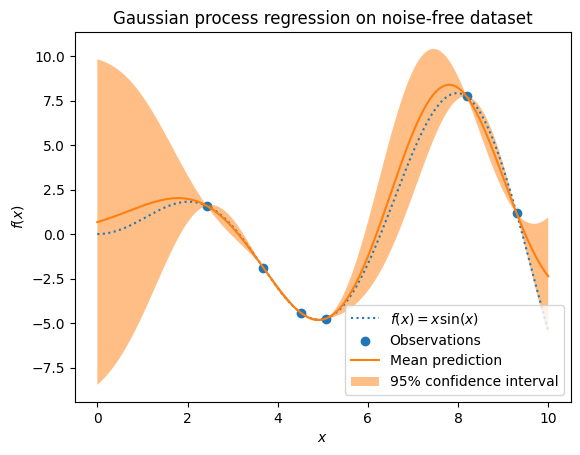

In [26]:
plt.plot(x, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(x_train, y_train, label="Observations")
plt.plot(x, mean_prediction, label="Mean prediction")
plt.fill_between(
    x.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

## add noise

In [24]:
noise_std = 0.75
y_train_noisy = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)
print(f'y_train = {y_train}')
print(f'y_train_noisy = {y_train_noisy}')

y_train = [-4.74492726  7.73514288 -4.44491693 -1.90051689  1.5957965   1.16380401]
y_train_noisy = [-4.10496563  7.63035908 -3.40518123 -1.4894197   0.3677093   4.13275604]


## train model

In [29]:
gaussian_process_with_noise = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9)
gaussian_process_with_noise.fit(x_train, y_train_noisy)
mean_prediction_with_noise, std_prediction_with_noise = gaussian_process_with_noise.predict(x, return_std=True)

## plot

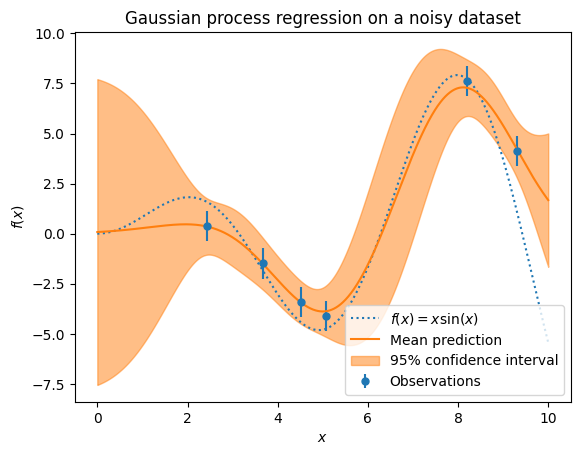

In [30]:
plt.plot(x, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.errorbar(
    x_train,
    y_train_noisy,
    noise_std,
    linestyle="None",
    color="tab:blue",
    marker=".",
    markersize=10,
    label="Observations",
)
plt.plot(x, mean_prediction_with_noise, label="Mean prediction")
plt.fill_between(
    x.ravel(),
    mean_prediction_with_noise - 1.96 * std_prediction_with_noise,
    mean_prediction_with_noise + 1.96 * std_prediction_with_noise,
    color="tab:orange",
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on a noisy dataset")

## compare with and without noise in plot

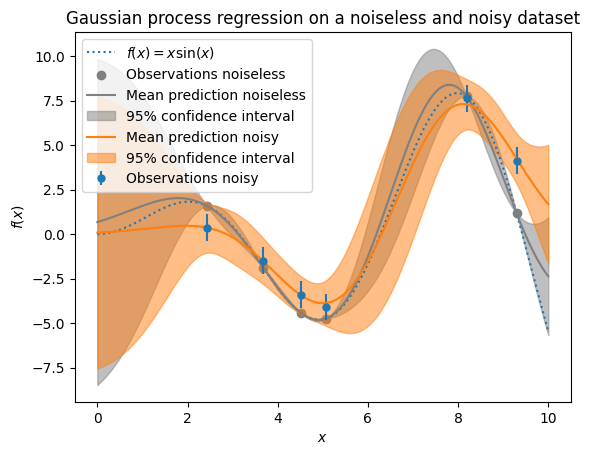

In [34]:
plt.plot(x, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")

plt.scatter(x_train, y_train, label="Observations noiseless", color='grey')
plt.plot(x, mean_prediction, label="Mean prediction noiseless", color='grey')
plt.fill_between(
    x.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
    color='grey',
)

plt.errorbar(
    x_train,
    y_train_noisy,
    noise_std,
    linestyle="None",
    color="tab:blue",
    marker=".",
    markersize=10,
    label="Observations noisy",
)
plt.plot(x, mean_prediction_with_noise, label="Mean prediction noisy")
plt.fill_between(
    x.ravel(),
    mean_prediction_with_noise - 1.96 * std_prediction_with_noise,
    mean_prediction_with_noise + 1.96 * std_prediction_with_noise,
    color="tab:orange",
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on a noiseless and noisy dataset")